<a href="https://colab.research.google.com/github/ekomissarov/data-analysis/blob/main/14_errors_of_type_1and2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

from tqdm.notebook import tqdm

plt.style.use('dark_background')

In [5]:
#Testing the hypothesis of equality of proportions
def proportions_asy_test(x, p0=0.5, alpha=0.05):
    p = x.mean()
    z_obs = (p - p0)/np.sqrt(p0*(1-p0)/x.size)
    pval = 1 - stats.norm.cdf(z_obs)
    return pval


In [8]:
#The significance level (type I error) is the probability of rejecting a hypothesis when it is true.
#We will try to calculate it using simulations to test the hypothesis about the mean.

n_obs = 10**5
res = np.zeros(n_obs)

bern_rv = stats.bernoulli(p=0.5)

for i in tqdm(range(n_obs)):
    x = bern_rv.rvs(100)
    res[i] = proportions_asy_test(x)

  0%|          | 0/1000000 [00:00<?, ?it/s]

In [10]:
#let's make sure that it really turns out to be the way we recorded it
np.mean(res < 0.05)

0.044255

In [12]:
#Type II error is the probability of not rejecting a hypothesis when it is false.
#We minimize the type II error using the residual principle. Let's find out what size it can be in our experiment.
n_obs = 10**5
res = np.zeros(n_obs)

bern_rv = stats.bernoulli(p=0.6)

for i in tqdm(range(n_obs)):
    x = bern_rv.rvs(100)
    res[i] = proportions_asy_test(x)

  0%|          | 0/100000 [00:00<?, ?it/s]

In [15]:
# for this effect size 0.6-0.5 = 0.1; for this significance level = 0.05 for sample size = 100
np.mean(res > 0.05)

0.37516

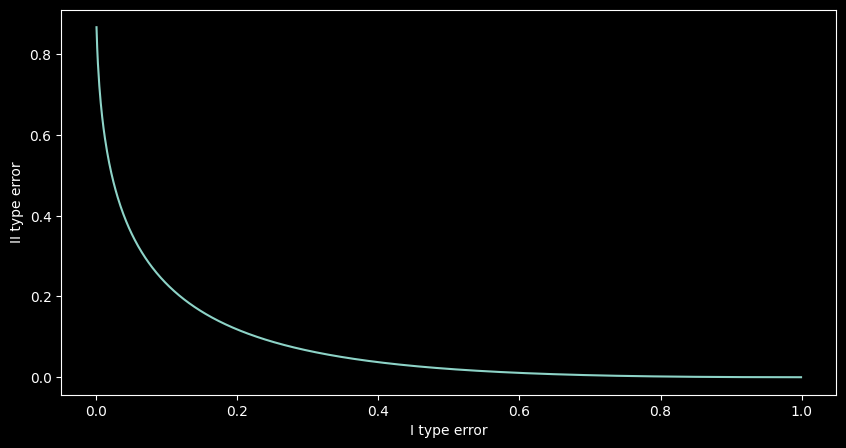

In [17]:
alpha = np.arange(0,1,0.001)[1:]
z_alpha = stats.norm().ppf(1 - alpha)

p0, pa = 0.5, 0.6
n = 100

sd0 = np.sqrt(p0*(1-p0)/n)
sda = np.sqrt(pa*(1-pa)/n)

beta = stats.norm().cdf(sd0/sda * z_alpha + (p0 - pa)/sda)

plt.figure(figsize = (10, 5))

plt.plot(alpha, beta)
plt.xlabel("I type error")
plt.ylabel("II type error");

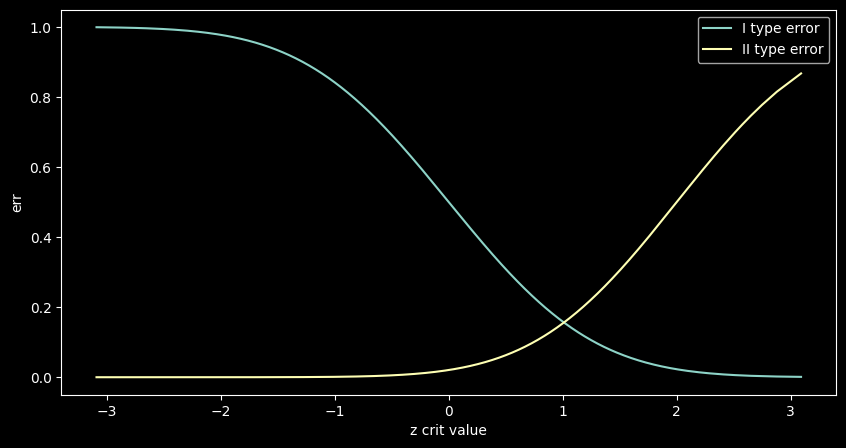

In [18]:
plt.figure(figsize = (10, 5))

plt.plot(z_alpha, alpha, label = "I type error")
plt.plot(z_alpha, beta, label = "II type error")

plt.xlabel("z crit value")
plt.ylabel("err")
plt.legend();


In [20]:
#theoretical beta is close to our simulated beta
beta[alpha == 0.05]

array([0.35850051])

In [23]:
def get_n(p0, pa, alpha=0.05, beta=0.05):
    za = stats.norm.ppf(1 - alpha)
    zb = stats.norm.ppf(1 - beta)
    sn = (np.sqrt(p0*(1 - p0))*za + np.sqrt(pa*(1 - pa))*zb)/(pa - p0)
    return sn**2

In [25]:
get_n(0.5, 0.6, alpha=0.05, beta=0.05)

265.11564803989296

In [26]:
get_n(0.5, 0.6, alpha=0.01, beta=0.01)

530.3104250795232

In [27]:
get_n(0.5, 0.51, alpha=0.01, beta=0.01)

54108.11998038348